In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
def sgn(x):
    return np.where(x >= 0, 1, -1)

def step(x):
    return np.where(x >= 0, 1, 0)

# Definición de la clase Perceptron
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, activation_function=sgn):
        self.cant_neurons = input_size
        self.weights = np.zeros(input_size + 1)  # +1 para el sesgo (bias)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.errors = []
        self.activation_function = activation_function

    def predict(self, X):
        # Calculo de la salida: w.X + b
        z = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.activation_function(z)

    def train(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for xi, target in zip(X, y):
                output = self.predict(xi)
                error = target - output
                total_error += abs(error)
                # Actualización de pesos y bias
                self.weights[1:] += self.learning_rate * error * xi
                self.weights[0] += self.learning_rate * error
            self.errors.append(total_error)
            # Si el error es cero, todos los patrones fueron aprendidos
    
def evaluate_capacity(max, num_epochs, input_size, learning_rate, repititions=10):
    capacity = []
    for i in range(1, max+1):
        count = 0
        for _ in range(repititions):
            x, y = generate_random_patterns(i, input_size)
            perceptron = Perceptron(input_size=input_size, learning_rate=learning_rate, epochs=num_epochs)
            perceptron.train(x, y)
            pred =  perceptron.predict(x)
            if np.all(pred == y):  # Si todas las predicciones son correctas
                count += 1
            
        capacity.append(count/(repititions))

    return capacity      




# Función para graficar el error durante el entrenamiento
def plot_error(evolution, title):
    plt.plot(evolution)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Total Error")
    plt.show()

# Función para graficar la frontera de decisión
def plot_decision_boundary(perceptron, X, y, title):
    plt.figure(figsize=(8, 6))
    # Puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
    # Recta discriminadora
    x_min, x_max = -0.5, 1.5
    y_min, y_max = (-perceptron.weights[0] - perceptron.weights[1] * x_min) / perceptron.weights[2], \
                   (-perceptron.weights[0] - perceptron.weights[1] * x_max) / perceptron.weights[2]
    plt.plot([x_min, x_max], [y_min, y_max], "k--")
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Generador de patrones aleatorios y etiquetas
def generate_random_patterns(num_patterns, input_size):
    X = np.random.uniform(-1, 1, (num_patterns, input_size)) 
    y = np.random.choice([-1, 1], num_patterns)
    return X, y


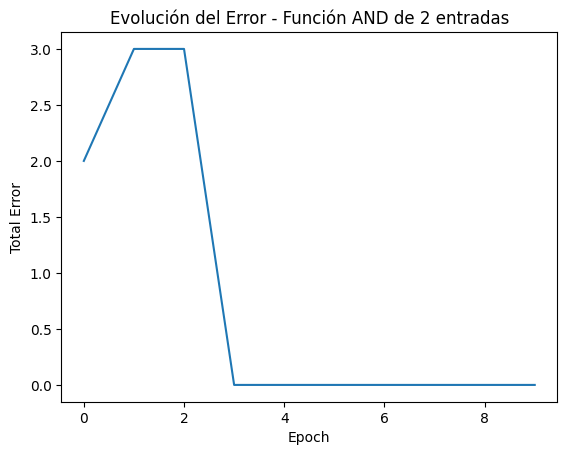

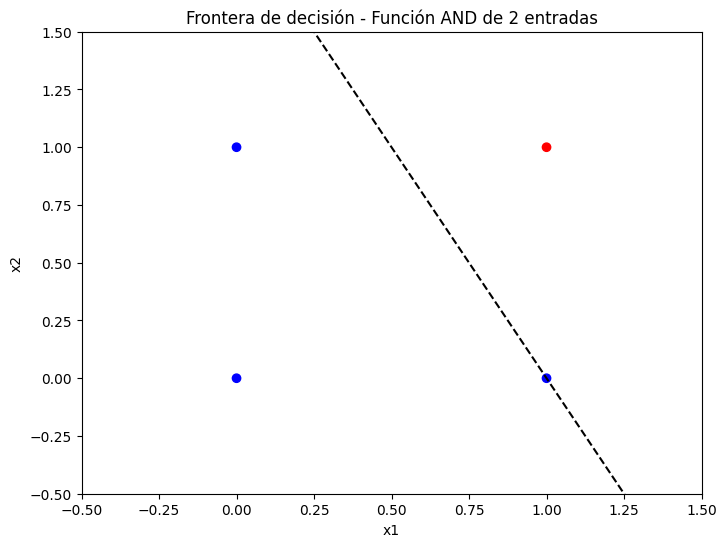

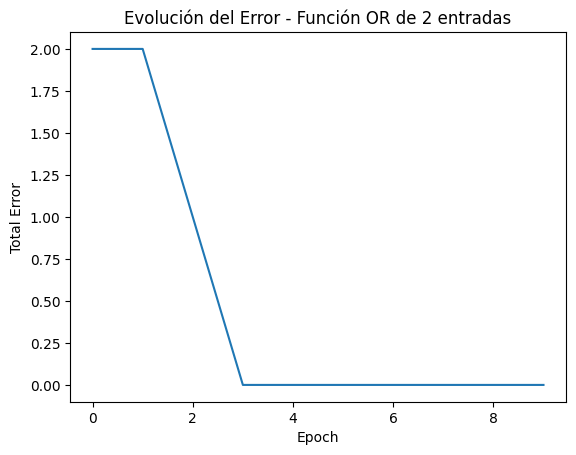

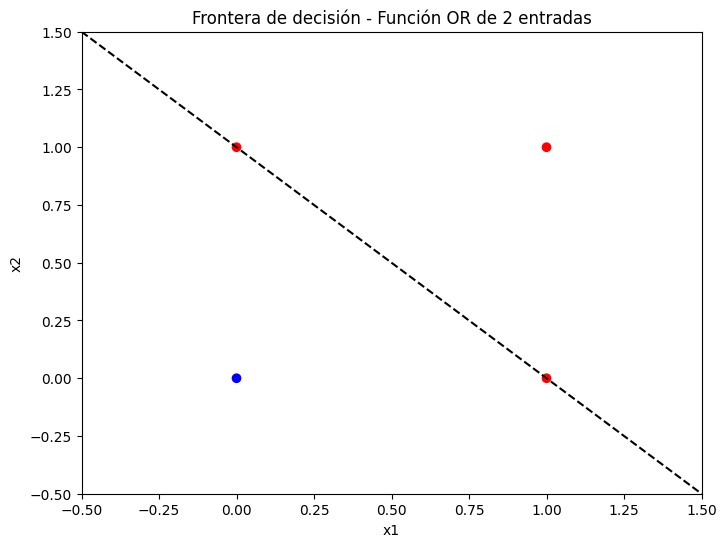

In [14]:
# Datos de entrenamiento para AND y OR de 2 entradas
X_2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_2 = np.array([0, 0, 0, 1])
y_or_2 = np.array([0, 1, 1, 1])

# Entrenamiento para función AND de 2 entradas
perceptron_and_2 = Perceptron(input_size=2, learning_rate=0.1, epochs=10, activation_function=step)
perceptron_and_2.train(X_2, y_and_2)
plot_error(perceptron_and_2.errors, "Evolución del Error - Función AND de 2 entradas")
plot_decision_boundary(perceptron_and_2, X_2, y_and_2, "Frontera de decisión - Función AND de 2 entradas")

# Entrenamiento para función OR de 2 entradas
perceptron_or_2 = Perceptron(input_size=2, learning_rate=0.1, epochs=10, activation_function=step)
perceptron_or_2.train(X_2, y_or_2)
plot_error(perceptron_or_2.errors, "Evolución del Error - Función OR de 2 entradas")
plot_decision_boundary(perceptron_or_2, X_2, y_or_2, "Frontera de decisión - Función OR de 2 entradas")

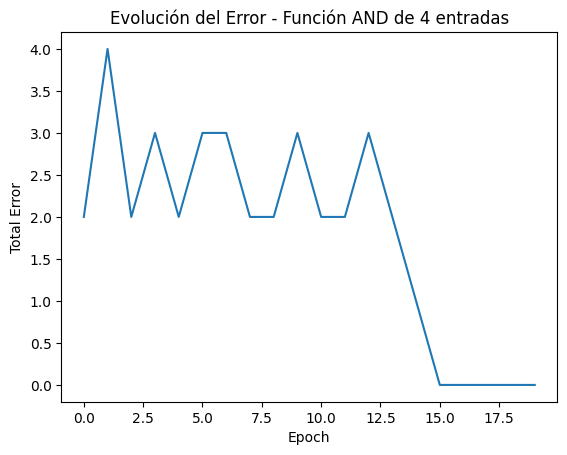

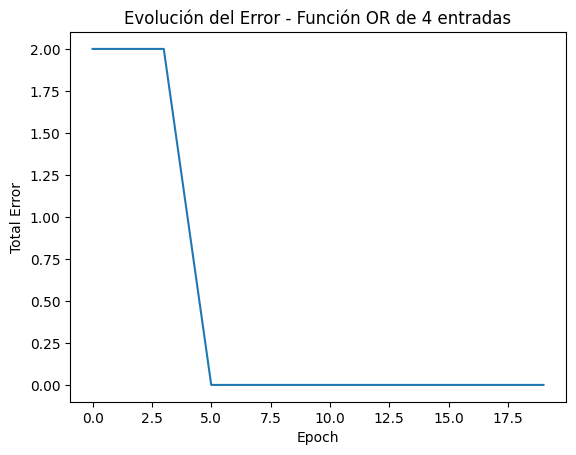

In [15]:
# Datos de entrenamiento para AND y OR de 4 entradas
X_4 = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1],
                [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1],
                [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1],
                [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])
y_and_4 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
y_or_4 = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Entrenamiento para función AND de 4 entradas
perceptron_and_4 = Perceptron(input_size=4, learning_rate=0.1, epochs=20, activation_function=step)
perceptron_and_4.train(X_4, y_and_4)
plot_error(perceptron_and_4.errors, "Evolución del Error - Función AND de 4 entradas")

# Entrenamiento para función OR de 4 entradas
perceptron_or_4 = Perceptron(input_size=4, learning_rate=0.1, epochs=20, activation_function=step)
perceptron_or_4.train(X_4, y_or_4)
plot_error(perceptron_or_4.errors, "Evolución del Error - Función OR de 4 entradas")

In [16]:
np.random.seed(42)
# Parámetros del experimento

input_sizes = [5, 10 , 15 , 20]      # Dimensión de entrada
epochs = 50       # Número de épocas de entrenamiento
repititions = 80
# Evaluación de la capacidad
capacity = []
for size in input_sizes:
    capacity.append(evaluate_capacity(size*4, epochs, size, 0.05, repititions=repititions))
# Gráfica del error en función de la cantidad de patrones

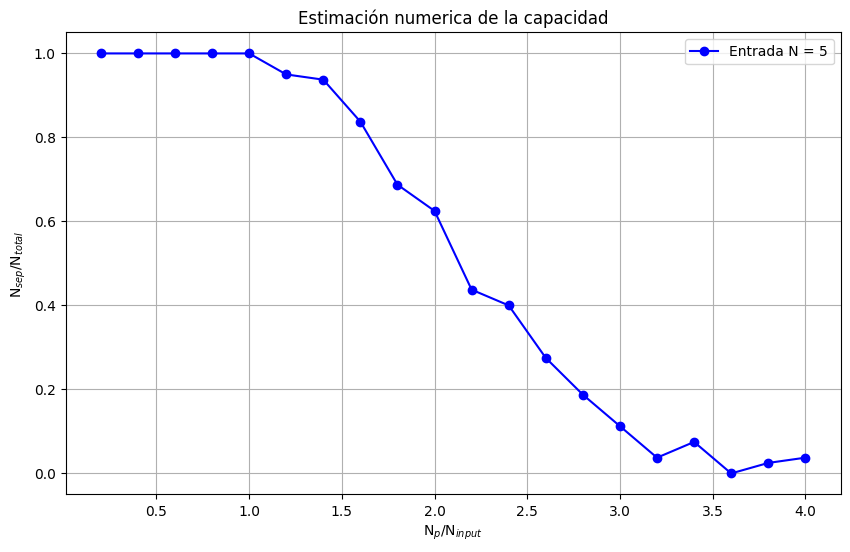

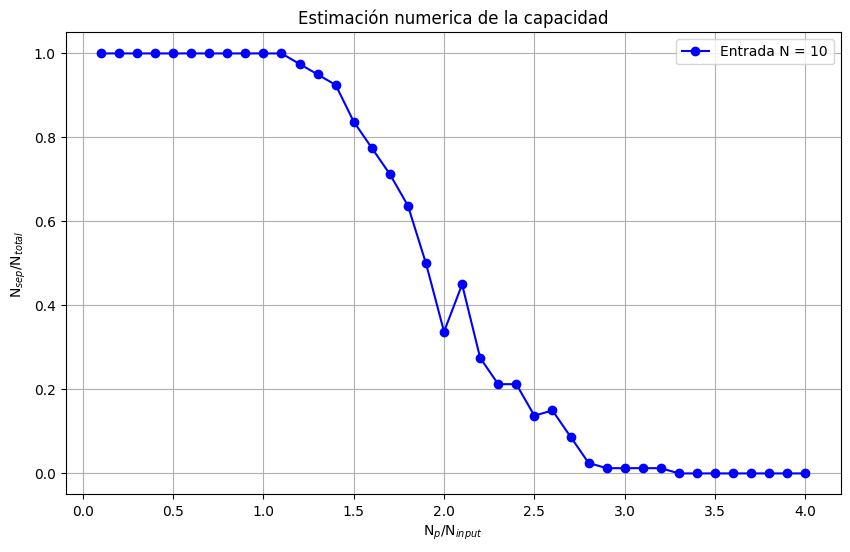

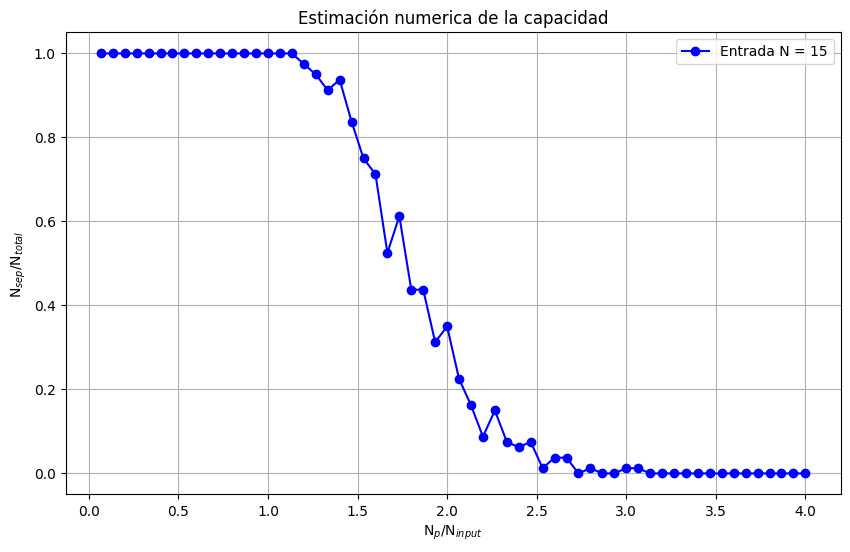

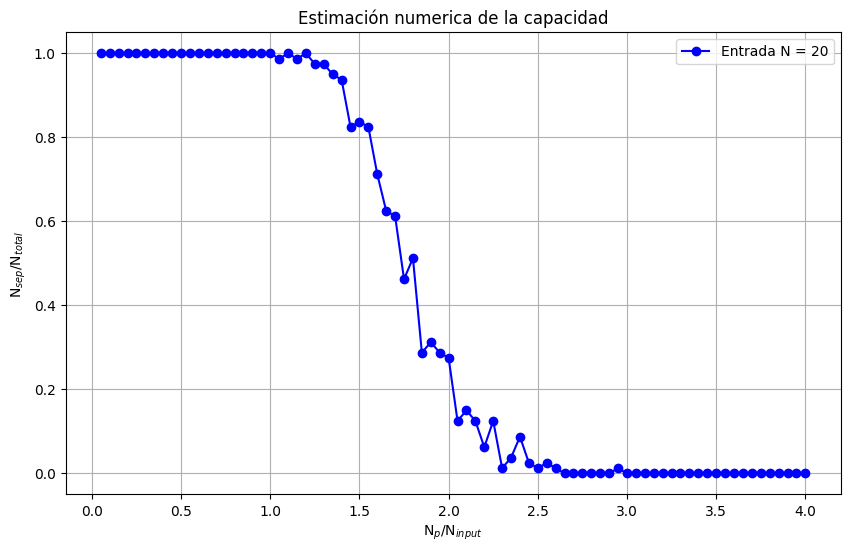

In [17]:
iter_n = 0
for size in input_sizes:
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(capacity[iter_n])+1)/size, capacity[iter_n], marker='o', color='b', label=f"Entrada N = {size}")
    plt.title("Estimación numerica de la capacidad")
    plt.xlabel("N$_p$/N$_{input}$")
    plt.ylabel("N$_{sep}$/N$_{total}$")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"Estimacion_N_P{size}.png")
    iter_n += 1
    plt.show()


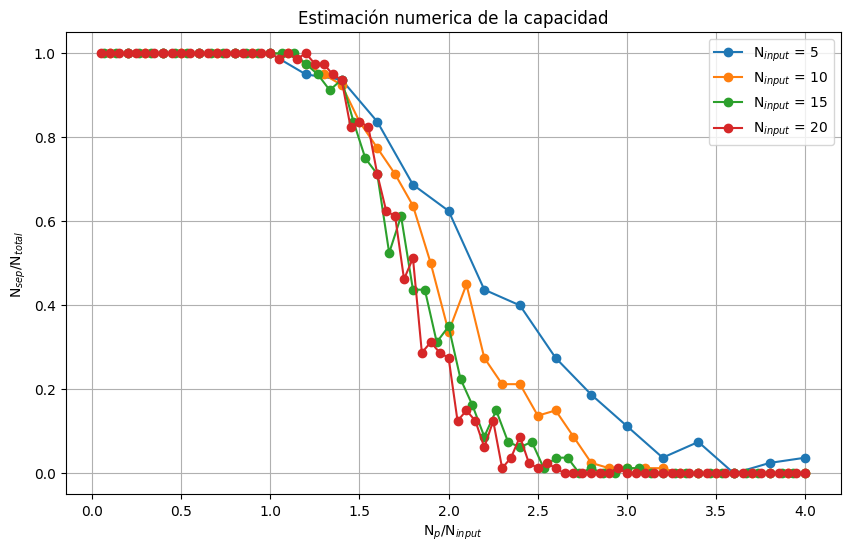

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(capacity[0])+1)/input_sizes[0], capacity[0], marker='o', label="N$_{input}$ = 5")
plt.plot(np.arange(1, len(capacity[1])+1)/input_sizes[1], capacity[1], marker='o', label="N$_{input}$ = 10")
plt.plot(np.arange(1, len(capacity[2])+1)/input_sizes[2], capacity[2], marker='o', label="N$_{input}$ = 15")
plt.plot(np.arange(1, len(capacity[3])+1)/input_sizes[3], capacity[3], marker='o', label="N$_{input}$ = 20")
plt.title("Estimación numerica de la capacidad")
plt.xlabel("N$_p$/N$_{input}$")
plt.ylabel("N$_{sep}$/N$_{total}$")
plt.grid(True)
plt.legend()
plt.savefig("estimacion_todos.png")
plt.show()

Epoch 0, Error MSE: 0.7441339200431255
Epoch 100, Error MSE: 0.4204569669857634
Epoch 200, Error MSE: 0.2531829176040155
Epoch 300, Error MSE: 0.08055556429615089
Epoch 400, Error MSE: 0.015064671885763783
Epoch 500, Error MSE: 0.0021584804592424053
Epoch 600, Error MSE: 0.0002776751527216606
Epoch 700, Error MSE: 3.432839084277767e-05
Epoch 800, Error MSE: 4.184363941239339e-06
Epoch 900, Error MSE: 5.075199061711063e-07
Epoch 1000, Error MSE: 6.145058985175339e-08
Epoch 1100, Error MSE: 7.435971219304558e-09
Epoch 1200, Error MSE: 8.996185916842295e-10
Epoch 1300, Error MSE: 1.0882972131181079e-10
Epoch 1400, Error MSE: 1.3165143933514802e-11
Epoch 1500, Error MSE: 1.5925749491956613e-12
Epoch 1600, Error MSE: 1.9265168755070024e-13
Epoch 1700, Error MSE: 2.3304795354224248e-14
Epoch 1800, Error MSE: 2.8191462216758876e-15
Epoch 1900, Error MSE: 3.4102784495235264e-16


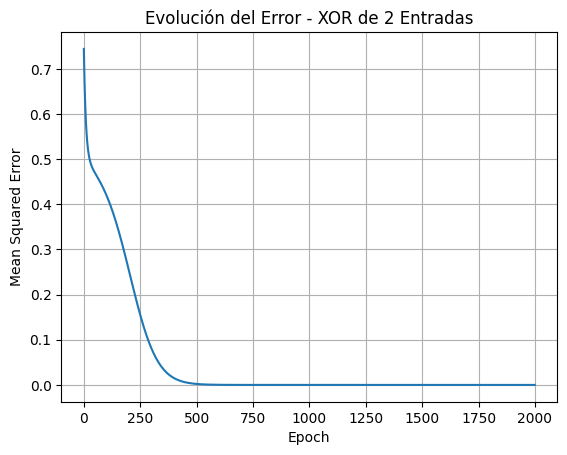

Epoch 0, Error MSE: 0.5991841894177881
Epoch 100, Error MSE: 0.4928274697609185
Epoch 200, Error MSE: 0.43794471049346145
Epoch 300, Error MSE: 0.2984050224332223
Epoch 400, Error MSE: 0.21098973216849723
Epoch 500, Error MSE: 0.17334446065740383
Epoch 600, Error MSE: 0.15161234471446064
Epoch 700, Error MSE: 0.13471801472169911
Epoch 800, Error MSE: 0.11990005766419745
Epoch 900, Error MSE: 0.10632224860028858
Epoch 1000, Error MSE: 0.09348786477293428
Epoch 1100, Error MSE: 0.08096911709553287
Epoch 1200, Error MSE: 0.06799426536305474
Epoch 1300, Error MSE: 0.05388918622348681
Epoch 1400, Error MSE: 0.0395946090072466
Epoch 1500, Error MSE: 0.02664858620573062
Epoch 1600, Error MSE: 0.01623734433339411
Epoch 1700, Error MSE: 0.00892944348710054
Epoch 1800, Error MSE: 0.004503481013048637
Epoch 1900, Error MSE: 0.002135649450749172


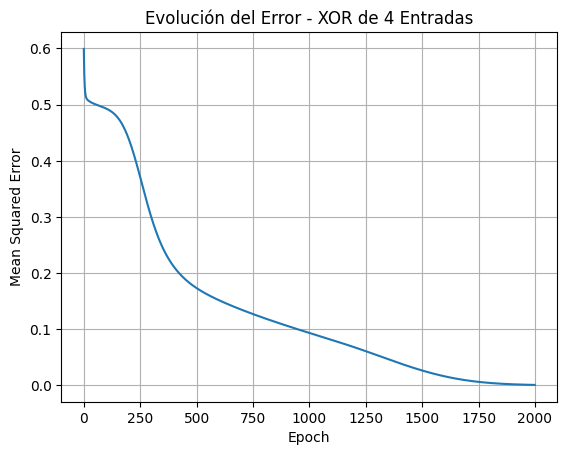

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones auxiliares para la red neuronal
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def MSE(y, y_hat):
    return 0.5*np.mean((y_hat - y.reshape(y_hat.shape))**2)

def grad_mse(y, y_hat):
    return y_hat - y.reshape(y_hat.shape)

# Función tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Derivada de la tangente hiperbólica
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def shuffle(x, y):
    indices = np.random.permutation(x.shape[0])

    shuffled_x = x[indices]
    shuffled_y = y[indices]

    return shuffled_x, shuffled_y

# Clase para el Perceptrón Multicapa con Backpropagation
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, learning_rate=0.1, epochs=10000, output_size=1):
        # Inicializar pesos aleatoriamente
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = 1  # Solo una salida para XOR
        
        # Pesos entre capa de entrada y capa oculta
        self.weights_input_hidden = np.random.normal(loc=0, scale=np.sqrt(2/(input_size+hidden_size)), size=(input_size, hidden_size))
        self.bias_hidden = np.zeros(hidden_size)
        
        # Pesos entre capa oculta y capa de salida
        self.weights_hidden_output = np.random.normal(loc=0, scale=np.sqrt(2/(hidden_size+output_size)), size=(hidden_size, output_size))
        self.bias_output =  np.zeros(output_size)
        
        # Para almacenar la evolución del error
        self.errors = []
        self.loss = []

    def forward(self, X):
        # Propagación hacia adelante
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = tanh(self.hidden_input)
        
        self.final_output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        
        return self.final_output

    def backward(self, X, y, output):
        # Cálculo del error
        output_error = MSE(y, output)
        self.errors.append(output_error)

        # calculo gradientes
        dldy = grad_mse(y, output)
        grad_weigths_output_hidden = np.dot(self.hidden_output.T,  dldy)
        grad_bias_output = dldy.mean(axis=0)

        dldh = np.dot(dldy, self.weights_hidden_output.T)*tanh_derivative(self.hidden_input)
        grad_weigths_input_hidden = np.dot(X.T, dldh)
        grad_bias_input = dldh.mean(axis=0)

        #actualizo los pesos
        self.weights_input_hidden += -self.learning_rate * grad_weigths_input_hidden
        self.bias_hidden += -learning_rate*grad_bias_input

        self.weights_hidden_output += -self.learning_rate*grad_weigths_output_hidden
        self.bias_output += -self.learning_rate*grad_bias_output        

    def train(self, X, y):
        for epoch in range(self.epochs):
            X, y = shuffle(X, y)
            # Propagación hacia adelante
            output = self.forward(X)
            # Backpropagation
            self.backward(X, y, output)
            # Condición de salida opcional
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Error MSE: {self.errors[-1]}")

    def predict(self, x):
        y = self.forward(x)
        return y 

# Función para graficar la evolución del error durante el entrenamiento
def plot_error(evolution, title):
    plt.plot(evolution)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.show()

# Datos de entrenamiento para XOR de 2 y 4 entradas
X_xor_2 = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_xor_2 = np.array([[-1], [1], [1], [-1]])

X_xor_4 = np.array([[-1, -1, -1, -1], 
                    [-1, -1, -1,  1], 
                    [-1, -1,  1, -1], 
                    [-1, -1,  1,  1],
                    [-1,  1, -1, -1], 
                    [-1,  1, -1,  1], 
                    [-1,  1,  1, -1], 
                    [-1,  1,  1,  1],
                    [ 1, -1, -1, -1], 
                    [ 1, -1, -1,  1], 
                    [ 1, -1,  1, -1], 
                    [ 1, -1,  1,  1],
                    [ 1,  1, -1, -1], 
                    [ 1,  1, -1,  1], 
                    [ 1,  1,  1, -1], 
                    [ 1,  1,  1,  1]])

y_xor_4 = np.array([[-1], [ 1], [ 1], [-1], 
                    [ 1], [-1], [-1], [ 1], 
                    [ 1], [-1], [-1], [ 1], 
                    [-1], [ 1], [ 1], [-1]])

# Parámetros de la red
input_size_2 = 2
input_size_4 = 4
hidden_size = 6
learning_rate = 0.01
epochs = 2000

# Entrenamiento para XOR de 2 entradas
mlp_xor_2 = MultiLayerPerceptron(input_size=input_size_2, hidden_size=hidden_size, learning_rate=learning_rate, epochs=epochs)
mlp_xor_2.train(X_xor_2, y_xor_2)
plot_error(mlp_xor_2.errors, "Evolución del Error - XOR de 2 Entradas")

# Entrenamiento para XOR de 4 entradas
mlp_xor_4 = MultiLayerPerceptron(input_size=input_size_4, hidden_size=hidden_size, learning_rate=learning_rate, epochs=epochs)
mlp_xor_4.train(X_xor_4, y_xor_4)
plot_error(mlp_xor_4.errors, "Evolución del Error - XOR de 4 Entradas")



In [109]:
pred_xor_2 = mlp_xor_2.predict(X_xor_2)
pred_xor_4 = mlp_xor_4.predict(X_xor_4)

for i in range(len(pred_xor_2)):
    print(f"El resultado obtenido de la red xor de 2 entradas es {pred_xor_2[i]}, el resjultado esperado es {y_xor_2[i]} ")


for i in range(len(pred_xor_4)):
    print(f"El resultado obtenido de la red  xor de 4 entradas es {pred_xor_4[i]}, el resjultado esperado es {y_xor_4[i]} ")

El resultado obtenido de la red xor de 2 entradas es [-0.99999999], el resjultado esperado es [-1] 
El resultado obtenido de la red xor de 2 entradas es [0.99999999], el resjultado esperado es [1] 
El resultado obtenido de la red xor de 2 entradas es [0.99999999], el resjultado esperado es [1] 
El resultado obtenido de la red xor de 2 entradas es [-0.99999999], el resjultado esperado es [-1] 
El resultado obtenido de la red  xor de 4 entradas es [-0.98699568], el resjultado esperado es [-1] 
El resultado obtenido de la red  xor de 4 entradas es [0.97986712], el resjultado esperado es [1] 
El resultado obtenido de la red  xor de 4 entradas es [1.00033948], el resjultado esperado es [1] 
El resultado obtenido de la red  xor de 4 entradas es [-1.00179867], el resjultado esperado es [-1] 
El resultado obtenido de la red  xor de 4 entradas es [0.97729808], el resjultado esperado es [1] 
El resultado obtenido de la red  xor de 4 entradas es [-0.87335588], el resjultado esperado es [-1] 
El r

In [21]:
def generar_datos(f, num_puntos=1000, test_split=0.2):
    """
    Genera conjuntos de datos para entrenamiento y prueba basados en una función f(x, y, z).

    Parámetros:
        f (function): Función para calcular la salida en base a (x, y, z).
        num_puntos (int): Número total de puntos a generar.
        test_split (float): Fracción de los datos que se usará para prueba.

    Retorna:
        X_train, y_train, X_test, y_test: Conjuntos de datos de entrada y salida para entrenamiento y prueba.
    """
    # Generar valores aleatorios en los rangos especificados
    x = np.random.uniform(0, 2 * np.pi, num_puntos)
    y = np.random.uniform(0, 2 * np.pi, num_puntos)
    z = np.random.uniform(-1, 1, num_puntos)
    
    # Crear la matriz de entrada
    X = np.column_stack((x, y, z))
    
    # Calcular la salida usando la función
    y_output = f(x, y, z)
    
    # Dividir en conjuntos de entrenamiento y prueba
    num_test = int(num_puntos * test_split)
    indices = np.random.permutation(num_puntos)
    
    # Barajar los datos y separar en train/test
    X_train = X[indices[num_test:]]
    y_train = y_output[indices[num_test:]]
    X_test = X[indices[:num_test]]
    y_test = y_output[indices[:num_test]]
    
    return X_train, y_train, X_test, y_test

# Definir la función f(x, y, z)
def f(x, y, z):
    return np.sin(x) + np.cos(y) + z

# Generar los datos
X_train, y_train, X_test, y_test = generar_datos(f, num_puntos=1000, test_split=0.2)

In [22]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Transformaciones para normalizar el dataset de MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download training data from open datasets.
training_data = MNIST(root='./data', train=True, transform=transform, download=True)

# Download test data from open datasets.
test_data =MNIST(root='./data', train=False, transform=transform, download=True)

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [23]:
class conv(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2 , 2)
        self.fc1 = nn.Linear(4*14*14, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 4 * 14 * 14)
        x = self.fc1(x)
        return x

# (1, 64) (2, 2) (fc) batch 64 , 7 min 85% 
# (1, 64) (2, 2) (fc) batch 128, 6,30 84%
# (1, 128) (2, 2) (fc) batch 128 12min 85%
# (1, 32) (2, 2) (fc) batch 32 4min 86% 
# (1, 128) (2 , 2) (fc batch) 32 13min 87%
# (1, 32) (2, 2) (fc) (fc) batch 32 87.4%
f_loss = nn.CrossEntropyLoss()
modelo = conv()
optimizer = optim.SGD(modelo.parameters(), lr=0.005)


batch_size = 64
# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


def train(model, loader, f_loss):
    model.train()
    loss_train = 0
    for images, labels in loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = f_loss(outputs, labels)
        loss_train += loss.item()
        loss.backward()
        optimizer.step()
    return loss_train/len(loader)

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

epochs = 10
loss_train = []
loss_test = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loss_train.append(train(modelo, train_dataloader, f_loss))
    loss_test.append(test(test_dataloader, modelo, f_loss))
print("Done!")

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Epoch 1
-------------------------------
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.469281 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 90.3%, Avg loss: 0.336124 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 90.7%, Avg loss: 0.316211 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 92.5%, Avg loss: 0.258968 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 92.6%, Avg loss: 0.247991 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 93.5%, Avg loss: 0.225866 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.214205 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 94.2%, Avg loss: 0.200107 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 92.9%, Avg loss: 0.241168 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 94.1%, Avg lo

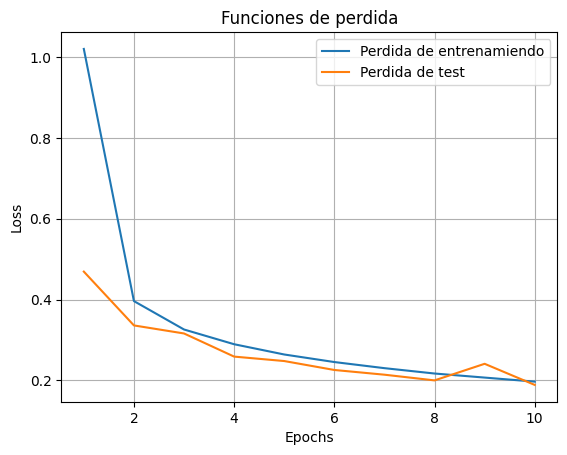

In [24]:
plt.figure()
plt.grid(True)
plt.plot(np.arange(1, len(loss_train)+1),  loss_train, label="Perdida de entrenamiendo")
plt.plot(np.arange(1, len(loss_train)+1),  loss_test, label="Perdida de test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Funciones de perdida")
plt.savefig("loss_conv.png")
plt.show()

In [65]:
class smallMLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x 
    
mlp = smallMLP(input_dim=28*28, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.005)

epochs = 10
loss_epoch = []
loss_MLP0 = 0
loss_epoch_test = []
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_dataloader:
        images = images.view(-1, 28*28)  # Aplanar las imágenes
        optimizer.zero_grad()
        predictions= mlp(images)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_epoch.append(total_loss/len(train_dataloader))
    loss_MLP0 = total_loss/len(train_dataloader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss_MLP0:.4f}")
correct = 0
mlp.eval()
total_loss = 0
loss_MLP0_test = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.view(-1, 28*28) 
        outputs = mlp(images)
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels).sum().item()
        total_loss += criterion(outputs, labels).item()
    loss_MLP0_test = total_loss/len(test_dataloader)
    loss_epoch_test.append(loss_MLP0_test)
    correct /= len(test_dataloader.dataset)
    print(f"Test Accuracy Avg: {correct*100:.4f}%")



Epoch [1/10], Loss: 1.0551
Epoch [2/10], Loss: 0.4627
Epoch [3/10], Loss: 0.3837
Epoch [4/10], Loss: 0.3492
Epoch [5/10], Loss: 0.3281
Epoch [6/10], Loss: 0.3125
Epoch [7/10], Loss: 0.2992
Epoch [8/10], Loss: 0.2882
Epoch [9/10], Loss: 0.2777
Epoch [10/10], Loss: 0.2679
Test Accuracy Avg: 92.6000%


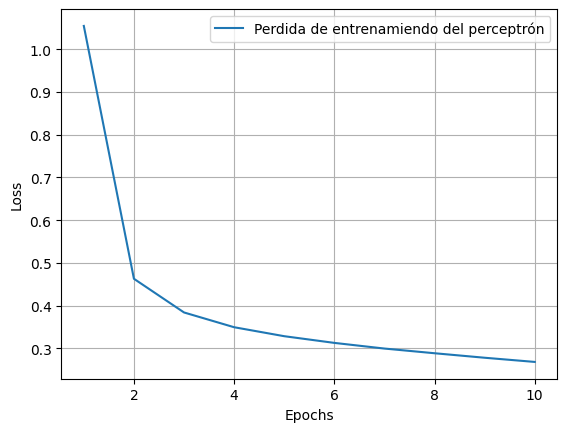

In [68]:
plt.figure()
plt.grid(True)
plt.plot(np.arange(1, len(loss_epoch)+1),  loss_epoch, label="Perdida de entrenamiendo del perceptrón")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("loss_small_MLP.png")
plt.show()

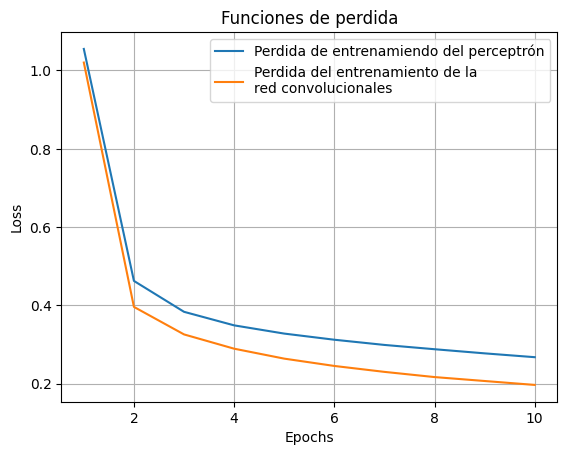

In [67]:
plt.figure()
plt.grid(True)
plt.plot(np.arange(1, len(loss_epoch)+1),  loss_epoch, label="Perdida de entrenamiendo del perceptrón")
plt.plot(np.arange(1, len(loss_train)+1), loss_train, label="Perdida del entrenamiento de la \nred convolucionales")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Funciones de perdida")
plt.savefig("loss_MLP_vs_conv.png")
plt.show()

In [46]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super(Autoencoder, self).__init__()
        # Encoder: Reducción de dimensionalidad
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim),
            nn.ReLU()
        )
        # Decoder: Reconstrucción
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 28*28),
            nn.Sigmoid()  # La salida reconstruida debe estar en [0, 1]
        )
    
    def forward(self, x):
        latent = self.encoder(x)
        reconstruction = self.decoder(latent)
        return reconstruction, latent



# Parámetros del modelo
latent_dim = 32
autoencoder = Autoencoder(latent_dim=latent_dim)
criterion = nn.MSELoss()  # Pérdida de reconstrucción
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Entrenamiento del Autoencoder
epochs = 10
autoencoder.train()
for epoch in range(epochs):
    total_loss = 0
    for images, _ in train_dataloader:
        images = images.view(-1, 28*28)  # Aplanar las imágenes
        optimizer.zero_grad()
        reconstructions, _ = autoencoder(images)
        loss = criterion(reconstructions, images)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_dataloader):.4f}")


Epoch [1/10], Loss: 0.9398
Epoch [2/10], Loss: 0.9031
Epoch [3/10], Loss: 0.8865
Epoch [4/10], Loss: 0.8809
Epoch [5/10], Loss: 0.8769
Epoch [6/10], Loss: 0.8738
Epoch [7/10], Loss: 0.8716
Epoch [8/10], Loss: 0.8701
Epoch [9/10], Loss: 0.8692
Epoch [10/10], Loss: 0.8686


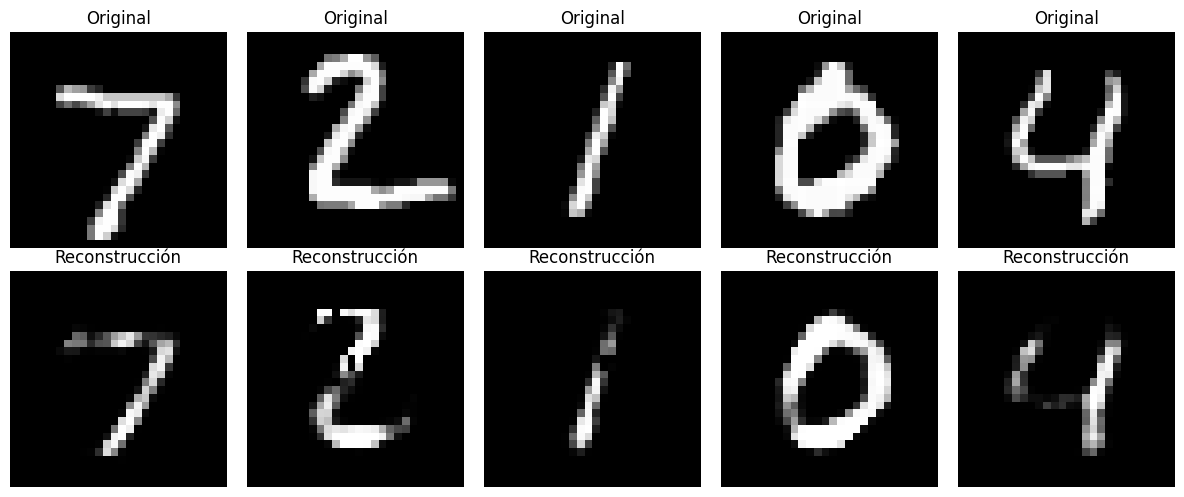

In [48]:
test_images, _ = next(iter((test_dataloader)))  # Obtener un lote del DataLoader de prueba
test_images = test_images[:5]  # Seleccionar las primeras 5 imágenes

# Realizar las reconstrucciones
with torch.no_grad():
    reconstructions, _ = autoencoder(test_images)

test_images = test_images.view(-1, 28, 28).cpu().numpy()
reconstructions = reconstructions.view(-1, 28, 28).cpu().numpy()

# Graficar las imágenes originales y sus reconstrucciones
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# Imágenes originales (primera fila)
for i in range(5):
    axes[0, i].imshow(test_images[i], cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

# Reconstrucciones (segunda fila)
for i in range(5):
    axes[1, i].imshow(reconstructions[i], cmap='gray')
    axes[1, i].set_title("Reconstrucción")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()



In [49]:
# Extraer representaciones latentes para el conjunto de entrenamiento
autoencoder.eval()
train_latents, train_labels = [], []
with torch.no_grad():
    for images, labels in train_dataloader:
        _, latents = autoencoder(images)
        train_latents.append(latents)
        train_labels.append(labels)

train_latents = torch.cat(train_latents)
train_labels = torch.cat(train_labels)


In [57]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

# usando las imagenes comprimidas
mlp = MLPClassifier(input_dim=latent_dim, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# Entrenamiento del clasificador
epochs = 10
mlp.train()
loss_epoch_MLP1 = []
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, len(train_latents), batch_size):
        batch_latents = train_latents[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = mlp(batch_latents)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        loss_MLP1 = total_loss/(len(train_latents)//batch_size)
    loss_epoch_MLP1.append(loss_MLP1)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss_MLP1:.4f}")


# Evaluar el desempeño
test_latents, test_labels = [], []
with torch.no_grad():
    for images, labels in test_dataloader:
        _, latents = autoencoder(images.view(-1, 28*28))
        test_latents.append(latents)
        test_labels.append(labels)

test_latents = torch.cat(test_latents)
test_labels = torch.cat(test_labels)

mlp.eval()
with torch.no_grad():
    outputs = mlp(test_latents)
    predictions = torch.argmax(outputs, dim=1)
    accuracy = (predictions == test_labels).sum().item()/len(predictions)
    
    print(f"Test Accuracy: {accuracy*100:.4f}%")


Epoch [1/10], Loss: 0.7224
Epoch [2/10], Loss: 0.4278
Epoch [3/10], Loss: 0.3547
Epoch [4/10], Loss: 0.3078
Epoch [5/10], Loss: 0.2761
Epoch [6/10], Loss: 0.2527
Epoch [7/10], Loss: 0.2352
Epoch [8/10], Loss: 0.2225
Epoch [9/10], Loss: 0.2132
Epoch [10/10], Loss: 0.2054
Test Accuracy: 93.9700%


In [55]:
mlp = MLPClassifier(input_dim=28*28, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

epochs = 10
loss_epoch = []
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_dataloader:
        images = images.view(-1, 28*28)  # Aplanar las imágenes
        optimizer.zero_grad()
        predictions= mlp(images)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_epoch.append(total_loss/len(train_dataloader))
    loss_MLP2 = total_loss/len(train_dataloader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss_MLP2:.4f}")
correct = 0
mlp.eval()
with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.view(-1, 28*28) 
        outputs = mlp(images)
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels).sum().item()
    correct /= len(test_dataloader.dataset)
    print(f"Test Accuracy Avg: {correct*100:.4f}%")


Epoch [1/10], Loss: 0.4321
Epoch [2/10], Loss: 0.2517
Epoch [3/10], Loss: 0.1900
Epoch [4/10], Loss: 0.1571
Epoch [5/10], Loss: 0.1353
Epoch [6/10], Loss: 0.1207
Epoch [7/10], Loss: 0.1094
Epoch [8/10], Loss: 0.1007
Epoch [9/10], Loss: 0.0940
Epoch [10/10], Loss: 0.0881
Test Accuracy Avg: 96.1000%


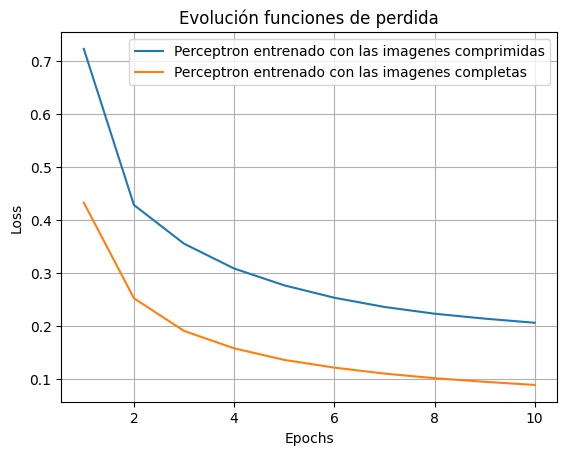

In [62]:
plt.figure()
plt.grid()
plt.title("Evolución funciones de perdida")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot(np.arange(1, len(loss_epoch_MLP1)+1), loss_epoch_MLP1, label="Perceptron entrenado con las imagenes comprimidas")
plt.plot(np.arange(1, len(loss_epoch)+1), loss_epoch, label="Perceptron entrenado con las imagenes completas")
plt.legend()
plt.savefig("evolucion_error_perceptrones_ej7.png")
plt.show()